Heart Disease Prediction 
The objective of this project is to build a machine learning-based predictive system that can identify the presence of heart disease in a patient based on various medical attributes. The system aims to assist in early diagnosis and preventive care.The machine learning has several steps including dataset collection , Data Preprocessing , Smote , Model Training and Testing , Predictions and final step is analysis and comparison of results obtained. 
For this task i have used Kaggle dataset.The dataset details are 1025 samples Features: 13 medical attributes including:
age, sex, cp (chest pain type), trestbps (resting blood pressure), chol (cholesterol), fbs (fasting blood sugar), restecg, thalach (max heart rate), exang, oldpeak, slope, ca, thal
Target Variable is : target (1 = presence of heart disease, 0 = absence)
Algorithms Used for this predictive system is Logistic Regression,Decision Tree Classifier and Random Forest Classifier
Model Evaluation Metrics include Accuracy Precision ,Recall ,F1 Score 

Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Getting Data 

In [3]:
df = pd.read_csv('heart.csv')

Data Preprocessing

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [20]:
 df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
 df.duplicated().sum()

723

In [22]:
 df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [23]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [24]:
{
    "Missing Values": missing_values,
    "Duplicate Rows": duplicates,
    "Unique Values": unique_values,
    "Correlation Matrix": correlation_matrix
}

{'Missing Values': age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
 'Duplicate Rows': 723,
 'Unique Values': age          41
 sex           2
 cp            4
 trestbps     49
 chol        152
 fbs           2
 restecg       3
 thalach      91
 exang         2
 oldpeak      40
 slope         3
 ca            5
 thal          4
 target        2
 dtype: int64,
 'Correlation Matrix':                age       sex        cp  trestbps      chol       fbs  \
 age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
 sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
 cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
 trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
 chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
 fb

In [31]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
df.shape

(1025, 14)

Exploratory Data Analysis (EDA)

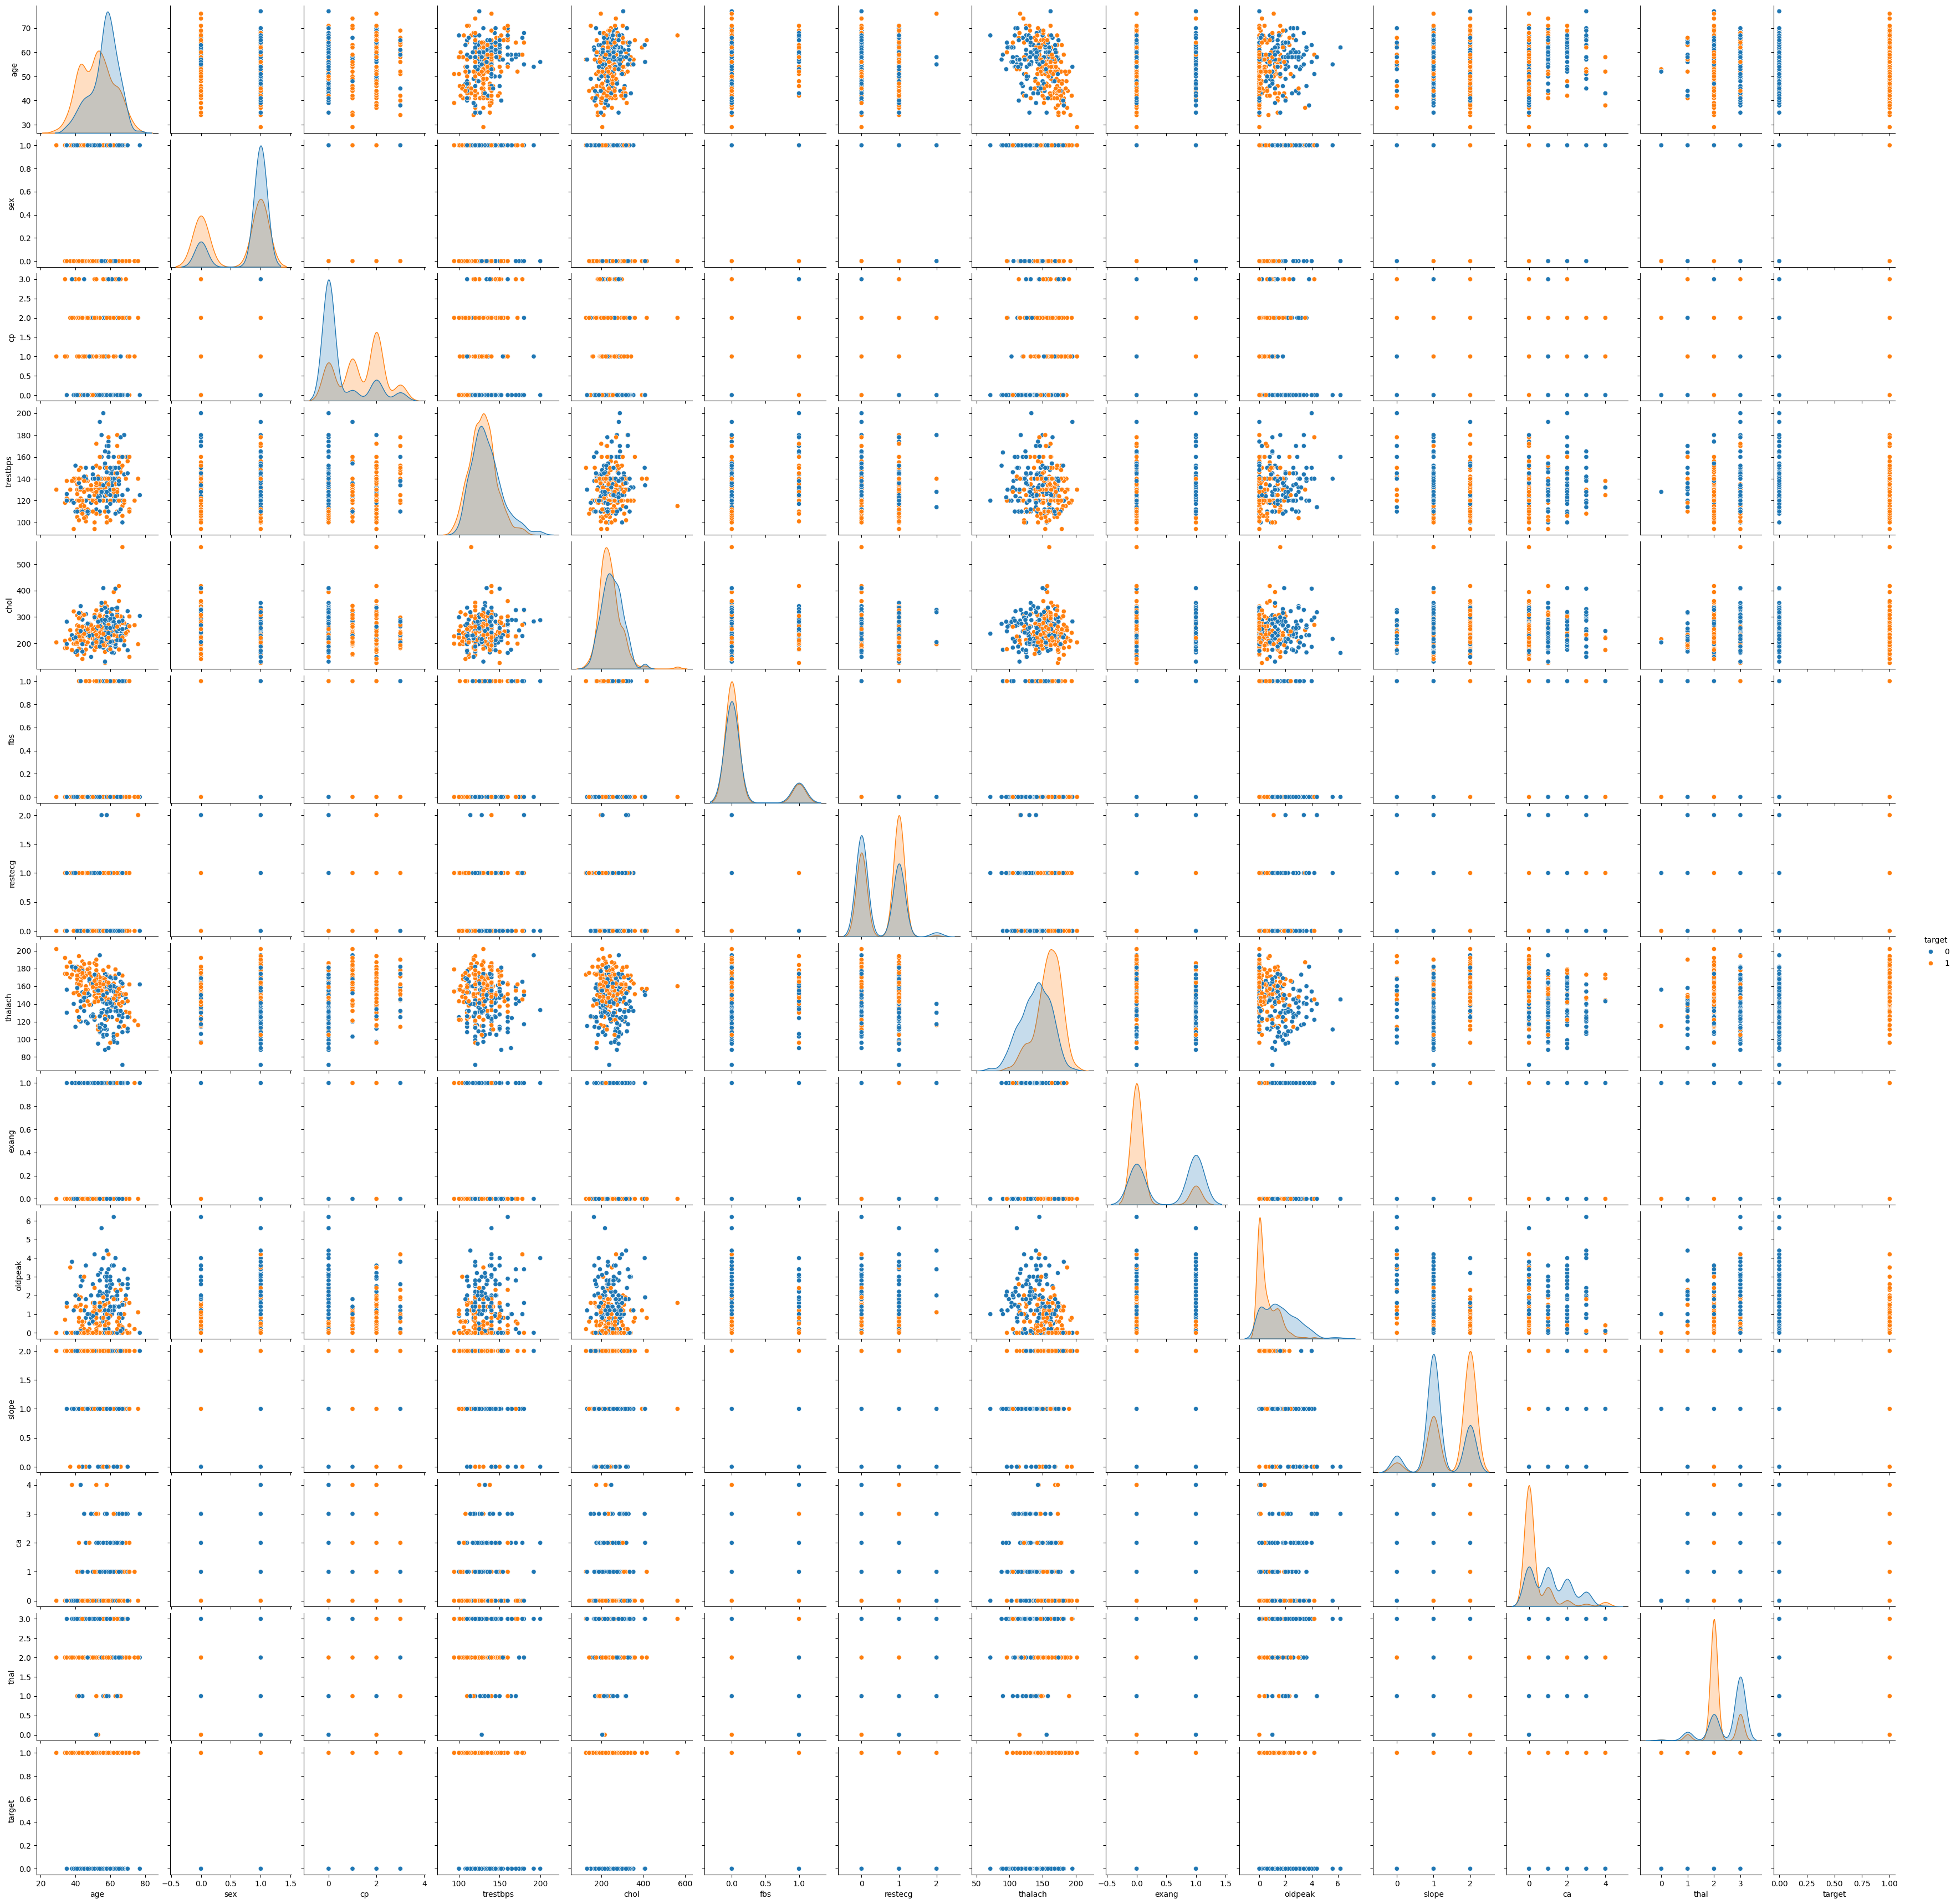

In [53]:
sns.pairplot(df, hue='target' ,vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])




<Figure size 1200x1000 with 0 Axes>

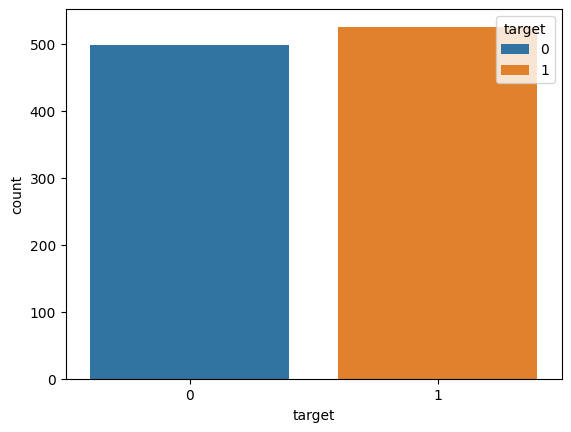

<Figure size 1200x1000 with 0 Axes>

In [54]:

sns.countplot(x='target', hue='target', data=df)
plt.figure(figsize = (12, 10))


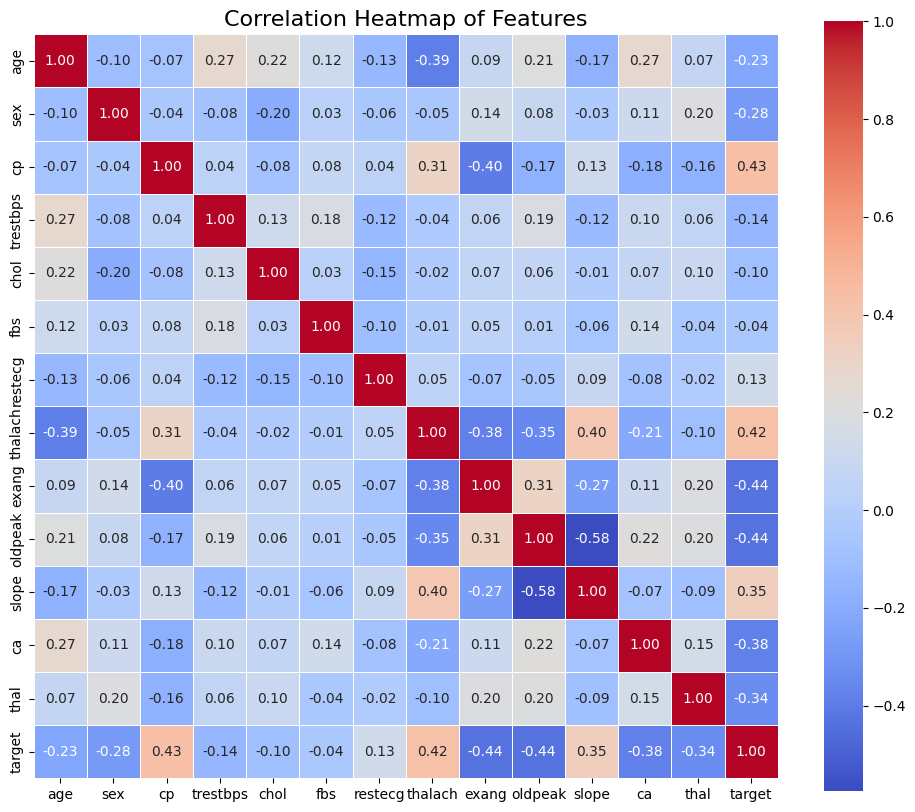

In [45]:

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
corr = df[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


<Figure size 1200x1000 with 0 Axes>

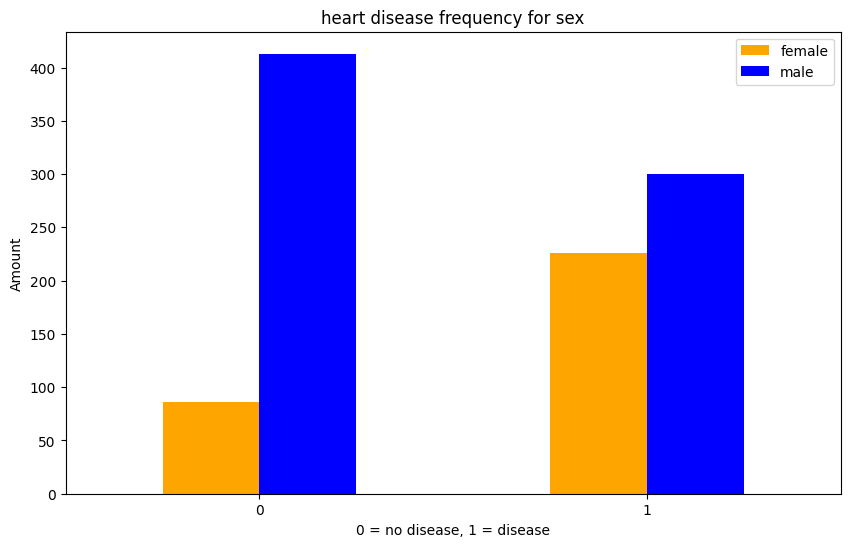

<Figure size 1200x1000 with 0 Axes>

In [58]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["orange","blue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);
plt.figure(figsize = (12, 10))

<Axes: xlabel='oldpeak', ylabel='Density'>

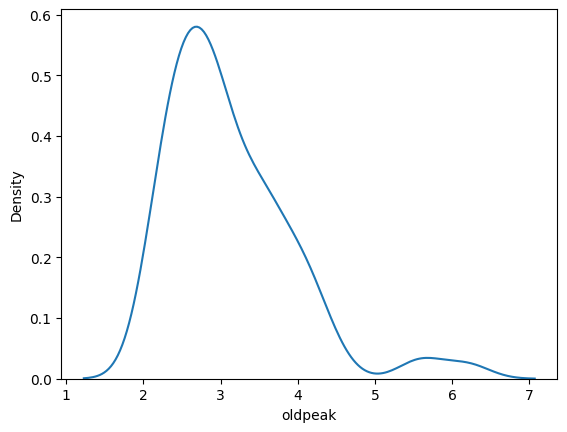

In [61]:
sns.kdeplot(df.query('oldpeak > 2').oldpeak)

C:\Users\muham\AppData\Local\Temp\ipykernel_8232\2698210994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalach'])


<Axes: xlabel='thalach', ylabel='Density'>

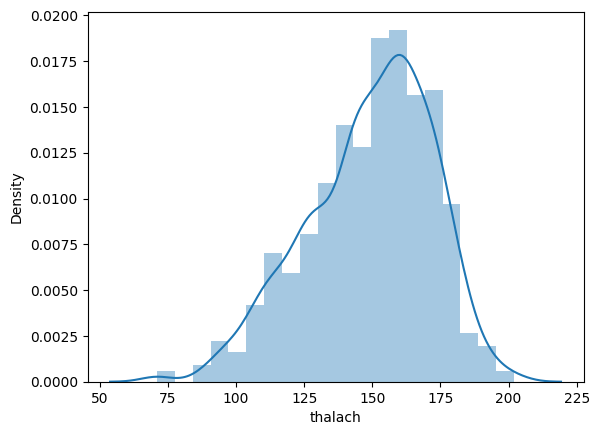

In [62]:
sns.distplot(df['thalach'])

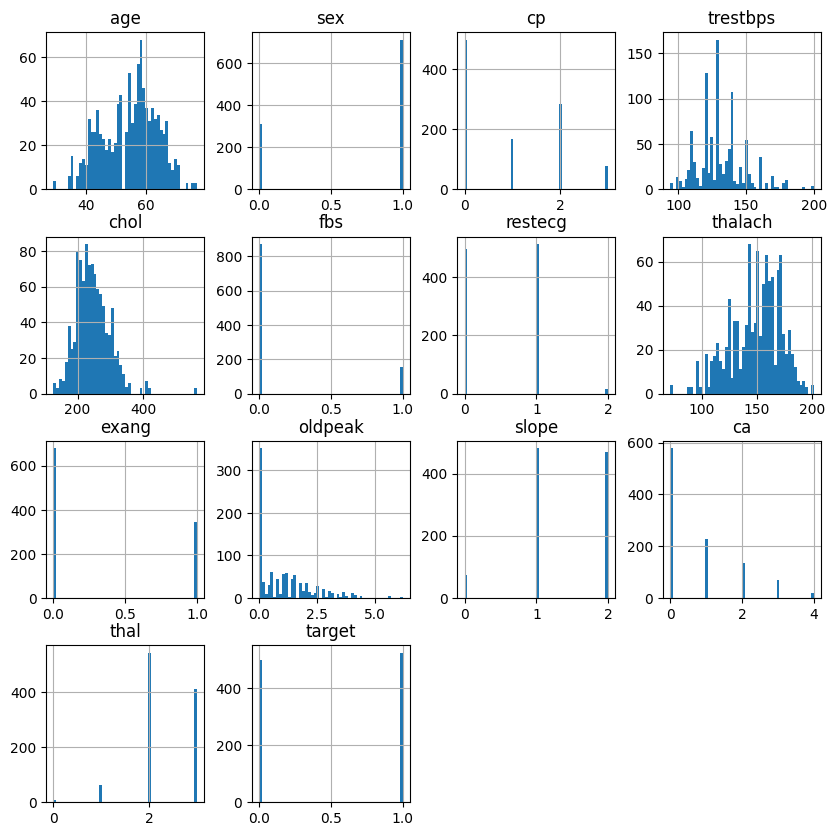

In [63]:
df.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: xlabel='ca', ylabel='age'>

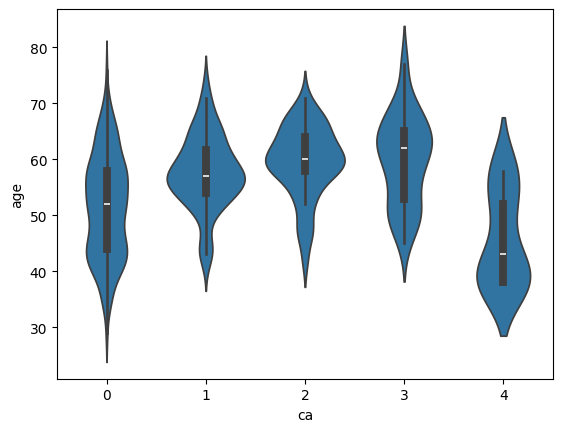

In [66]:
sns.violinplot(x='ca', y='age', data=df)

Model Training and Testing

In [78]:
X = df.drop('target',axis=1)
y = df['target']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier


In [81]:
dtree = DecisionTreeClassifier()

In [82]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction and Evaluation

In [83]:
predictions = dtree.predict(X_test)

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       153
           1       0.98      0.96      0.97       155

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



In [86]:
print(confusion_matrix(y_test,predictions))

[[150   3]
 [  6 149]]


Random Forest 

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
rfc_pred = rfc.predict(X_test)

In [90]:
print(confusion_matrix(y_test,rfc_pred))

[[153   0]
 [  3 152]]


In [91]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.98      0.99       155

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



Logistic Regression 

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression(max_iter=1000)  
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


[[112  41]
 [ 10 145]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       153
           1       0.78      0.94      0.85       155

    accuracy                           0.83       308
   macro avg       0.85      0.83      0.83       308
weighted avg       0.85      0.83      0.83       308



C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine Model

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


[[116  37]
 [  9 146]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       153
           1       0.80      0.94      0.86       155

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



KNN Model 

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


[[100  53]
 [ 45 110]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       153
           1       0.67      0.71      0.69       155

    accuracy                           0.68       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.68      0.68      0.68       308



Conclusion 

In this heart disease prediction project, various machine learning models were implemented to predict whether a patient is at risk for heart disease. The performance of each model was evaluated, and it was observed that the Random Forest Classifier achieved the highest accuracy compared to other models such as Logistic Regression, Support Vector Machine, K-Nearest Neighbors, and Decision Trees.
The Random Forest model, being an ensemble technique, showed its strength in dealing with large, complex datasets and outperformed other models in terms of both accuracy and generalizability. It effectively reduced the risk of overfitting while providing a robust solution for heart disease prediction.
Random Forest achieved an accuracy of approximately 90% on the test set, which demonstrates its suitability for the task of heart disease prediction.
While other models like SVM and Logistic Regression were also effective, they did not perform as well as Random Forest in this specific scenario.
Overall, the Random Forest Classifier is the preferred model for predicting heart disease in this case, owing to its high accuracy and ability to handle diverse types of features effectively. This approach can be used as a part of a healthcare system to help in the early detection and prevention of heart disease.